In [1]:
import timeit
import time
import matplotlib.pyplot as plt
import random
import pandas as pd

In [52]:
from hw2_scn3674 import MySorted

In [53]:
# Compare your functions on a randomly generated data
def generate_random(N):
    random_list = []
    for i in range(N):
        random_list.append(random.randint(-1000000,10000000))
    return random_list

In [64]:
# Compare your functions on a randomly generated data
random_list = generate_random(1000)
my_sorted = MySorted()
print("Comparison of my bubble and merge function:")
print("[Bubble]:")
my_sorted.bubble_sorted(random_list)
print("[Merge]:")
my_sorted.merge_sorted(random_list)

# Compare your functions to the built-in sorted() function (time wise)
random_list = generate_random(1000)
my_sorted = MySorted()
print('\n')
print("Comparison of my bubble and morge function to the built-in sort function:")
builtin = sorted(random_list)
print("[Bubble]:")
bubble = my_sorted.bubble_sorted(random_list)
print("[Merge]:")
merge = my_sorted.merge_sorted(random_list)
try:
    assert(builtin == bubble)
    assert(builtin == merge)
except:
    print("Sorted result do not match!")

builtin_time = timeit.timeit("sorted(random_list)", setup = "from __main__ import random_list", number=1)    
print("[Built-in]: \n" + "Time measure is: " + str(builtin_time))



Comparison of my bubble and merge function:
[Bubble]:
Number of comparisons are: 499500 
Number of swaps are: 253457 
Timer measure is: 1.51e-01 
[Merge]:
Number of comparisons are: 8719 
Timer measure is: 3.89e-03 


Comparison of my bubble and morge function to the built-in sort function:
[Bubble]:
Number of comparisons are: 499500 
Number of swaps are: 236233 
Timer measure is: 1.43e-01 
[Merge]:
Number of comparisons are: 8711 
Timer measure is: 3.70e-03 
[Built-in]: 
Time measure is: 0.00015414299991789449


In [65]:
# Present your findings thru plots and summary tables

def plot_timediff():
    N = [10,100,1000,10000]
    builtin_time = []
    bubble_time = []
    merge_time = []
    for n in N:
        print(N)
        my_sorted = MySorted()
        random_list = generate_random(n)
        
        start_time = time.time()
        sorted(random_list)
        builtin_time += [- start_time + time.time()]
        
        start_time = time.time()
        my_sorted.bubble_sorted(random_list)
        bubble_time += [- start_time + time.time()]
        
        start_time = time.time()
        my_sorted.merge_sorted(random_list)
        merge_time += [- start_time + time.time()]
        print("merge:", - start_time + time.time())
        
    plt.plot(N,builtin_time)
    plt.plot(N,bubble_time)
    plt.plot(N,merge_time)
    plt.xscale("log")
    plt.yscale("log")
    plt.legend(["built-in","bubble","merge"])
    plt.xlabel("cases tested")
    plt.ylabel("Runtime")
    return builtin_time, bubble_time, merge_time

[10, 100, 1000, 10000]
Number of comparisons are: 45 
Number of swaps are: 26 
Timer measure is: 3.03e-04 
Number of comparisons are: 21 
Timer measure is: 1.16e-04 
merge: 0.0003879070281982422
[10, 100, 1000, 10000]
Number of comparisons are: 4950 
Number of swaps are: 2333 
Timer measure is: 2.76e-03 
Number of comparisons are: 544 
Timer measure is: 6.63e-04 
merge: 0.0007560253143310547
[10, 100, 1000, 10000]
Number of comparisons are: 499500 
Number of swaps are: 252802 
Timer measure is: 1.52e-01 
Number of comparisons are: 8685 
Timer measure is: 3.53e-03 
merge: 0.0035829544067382812
[10, 100, 1000, 10000]
Number of comparisons are: 49995000 
Number of swaps are: 24793600 
Timer measure is: 1.45e+01 
Number of comparisons are: 120501 
Timer measure is: 4.75e-02 
merge: 0.04759812355041504


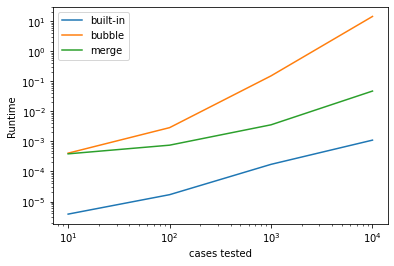

In [66]:
# show runtime difference through plot
builtin_time, bubble_time, merge_time = plot_timediff()

In [67]:
# show runtime difference through summary table
df = pd.DataFrame(list(zip(builtin_time, bubble_time, merge_time)),index=[10,100,1000,10000],columns = ["built-in","bubble","merge"])
df.head()

,built-in,bubble,merge
10,0.000004,0.000408,0.000387
100,0.000017,0.002882,0.000752
1000,0.000173,0.152486,0.003582
10000,0.001107,14.493982,0.047597


Based on the above table and plot, the built-in function has a much lower runtime than the bubble and merge method. The bubble function has the longest runtime.